In [5]:

from src.data_manager.rflab_np_manager import RflabNpDataManager
import numpy as np
from keras.utils import to_categorical
from keras import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, BatchNormalization, LSTM, Conv1D, Reshape, Dropout
from keras.datasets import imdb
from keras.utils import pad_sequences
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)
# plt.plot(arr[0], label='a')
# plt.figure()
# plt.plot(arr[1], label='b')
# plt.figure()
# plt.plot(arr2[0], label='c')
# plt.figure()
# plt.plot(arr2[1], label='d')

In [6]:
data = []
for i in range(6):
    for j in range(9): 
        filename = 'data/rf-lab/nine_movs_six_sub_split/' + str(i + 1) + '_' + str(j + 1) + '.txt'
        x = np.load(filename, allow_pickle=True)
        x = np.array(x)
        for line in x:
            line = np.insert(line,0,[i, j])
            data.append(line)
        
df = pd.DataFrame(data)
df = df.rename(columns={0: "subject", 1: "move"})
# display(df[df['move'] == 7])


In [182]:
from scipy.stats.stats import pearsonr

# print(pearsonr(arr[0],arr[1]))
# print(pearsonr(arr[0],arr2[1]))
print(df)
print((df.groupby(['subject', 'move']).count().groupby('move').mean()))

      subject  move          2          3          4         5          6  \
0         0.0   0.0   1.270740 -10.895926 -14.729259 -4.895926   3.437407   
1         0.0   0.0   7.270741  -4.895926  -6.729259  4.770741  13.270741   
2         0.0   0.0  -0.895926 -12.062593  -9.562593  2.937407   9.437407   
3         0.0   0.0 -14.562593 -23.562593 -18.562593 -6.229259  -2.229259   
4         0.0   0.0  -2.062593 -10.729259  -4.062593  5.770741   5.270741   
...       ...   ...        ...        ...        ...       ...        ...   
2815      5.0   8.0  -1.925307  -3.091973  -3.925307 -4.258640  -2.591973   
2816      5.0   8.0  -4.591973  -2.091973  -1.758640  2.241360   3.408027   
2817      5.0   8.0  -0.925307  -5.258640  -0.591973  0.408027  -1.925307   
2818      5.0   8.0   5.741360  -0.425307   1.574693  5.241360   4.908027   
2819      5.0   8.0  -4.925307  -4.425307  -8.425306 -8.758640  -7.258640   

              7          8          9  ...       392        393        394 

In [8]:
subject_one = df['subject'] == 1
move_one = df['move'] == 0
first_subject_data = df[subject_one & move_one]

subject_two = df['subject'] == 2
second_subject_data = df[subject_two & move_one]


data1 = first_subject_data.drop(columns=['subject','move']).sample(1).values
data2 = second_subject_data.drop(columns=['subject','move']).sample(1).values

# display(data1.shape)


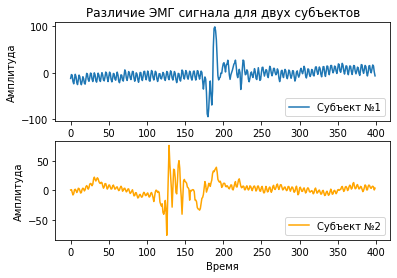

<Figure size 432x288 with 0 Axes>

In [42]:
from scipy import signal
from scipy.fft import fft, ifft

def filter_signal(x):
    N = 10 
    Fc = 40
    Fs = 1600
    h = signal.firwin(numtaps=N, cutoff=40, nyq=Fs/2)
    y = signal.lfilter(h, 1.0, x)
    return y




plt.subplot(2, 1, 1)
plt.plot(data1[0], label='Субъект №1')
plt.title('Различие ЭМГ сигнала для двух субъектов') # Raw EMG signal and filtered
plt.ylabel('Амплитуда') # Value
plt.legend(loc='lower right')

plt.subplot(2, 1, 2)
plt.plot(data2[0], 'orange', label='Субъект №2')
plt.ylabel('Амплитуда') # Value
plt.xlabel('Время') # Time (sec)
plt.legend(loc='lower right')

plt.figure()
filtered_signal_from_first_person = filter_signal(data1[0])
filtered_signal_from_second_person = filter_signal(data2[0])

# Fourier
y = fft(data1[0])
y2 = fft(filtered_signal_from_first_person)



/Users/antonvasilev/PyCharmProjects/emg-interface/venv/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/antonvasilev/PyCharmProjects/emg-interface/venv/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/antonvasilev/PyCharmProjects/emg-interface/venv/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/antonvasilev/PyCharmProjects/emg-interface/venv/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


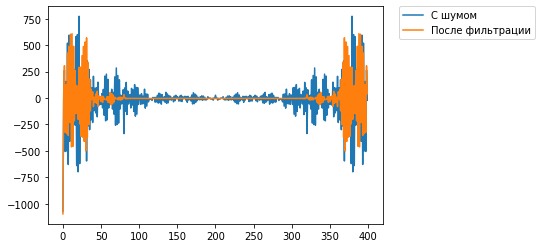

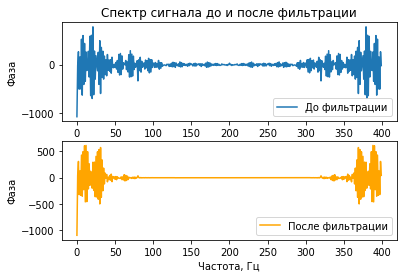

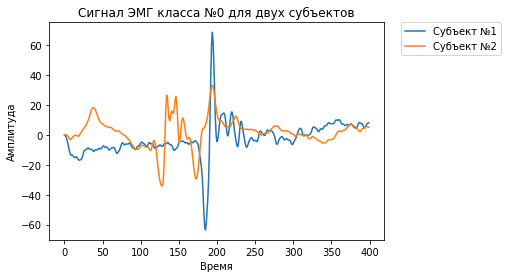

In [44]:
plt.plot(y, label='С шумом') # noizy
plt.plot(y2, label='После фильтрации') # filtered
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(y, label='До фильтрации')
plt.title('Спектр сигнала до и после фильтрации') # FFT of Raw EMG signal and filtered
plt.ylabel('Фаза') # Magnitude of the FFT
plt.legend(loc='lower right')

plt.subplot(2, 1, 2)
plt.plot(y2, 'orange', label='После фильтрации')
plt.xlabel('Частота, Гц') # Frequencies (Hz)
plt.ylabel('Фаза') # Magnitude of the FFT
plt.legend(loc='lower right')
plt.show()


plt.figure()
plt.plot(filtered_signal_from_first_person, label='Субъект №1') # First person
plt.plot(filtered_signal_from_second_person, label='Субъект №2') # Second person
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.title('Сигнал ЭМГ класса №0 для двух субъектов') # EMG signal for same gesture from couple persons
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

2022-10-14 23:42:16.946990: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 64)        1664      
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 400)               2509200   
                                                                 
Total params: 2,529,328
Trainable params: 2,529,328
Non-trainable params: 0
_________________________________________________________________


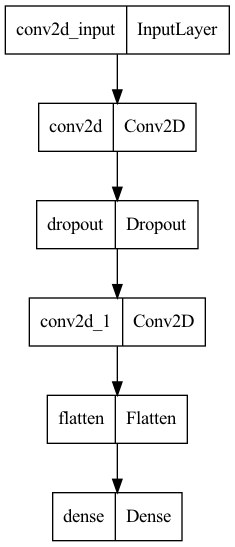

In [28]:
# Neural network model
!pip install pydot

from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout
from keras.utils import plot_model


input_dim = 400
output_dim = 400

model = Sequential()
input_shape=(20,20,1,)
model.add(Conv2D(filters=64, kernel_size=(5,5), activation="relu", input_shape=input_shape))
model.add(Dropout(0.5))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu"))
model.add(Flatten())
model.add(Dense(400))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

model.summary()
plot_model(model, to_file='emg_filtering_model.png')

In [29]:
X = df.drop(columns=['subject','move']).values
y = df.drop(columns=['subject','move']).values

for i in range(len(y)):
    y[i] = filter_signal(y[i])

X2 = np.zeros((len(X), 20, 20, 1))
for i in range(len(X)):
    data = X[i]
    X2[i] = np.reshape(data, (20,20,1))

X = X2

In [30]:

print(X.shape)
print(y.shape)
model.fit(X, y, verbose=2, epochs=20, batch_size=64)

(2820, 20, 20, 1)
(2820, 400)
Epoch 1/20
45/45 - 2s - loss: 362.0569 - accuracy: 0.0418 - 2s/epoch - 50ms/step
Epoch 2/20
45/45 - 2s - loss: 98.6719 - accuracy: 0.1184 - 2s/epoch - 35ms/step
Epoch 3/20
45/45 - 2s - loss: 63.2613 - accuracy: 0.1936 - 2s/epoch - 34ms/step
Epoch 4/20
45/45 - 2s - loss: 50.2869 - accuracy: 0.2358 - 2s/epoch - 34ms/step
Epoch 5/20
45/45 - 2s - loss: 36.8339 - accuracy: 0.2933 - 2s/epoch - 34ms/step
Epoch 6/20
45/45 - 2s - loss: 27.8374 - accuracy: 0.3344 - 2s/epoch - 34ms/step
Epoch 7/20
45/45 - 2s - loss: 24.9866 - accuracy: 0.3656 - 2s/epoch - 35ms/step
Epoch 8/20
45/45 - 2s - loss: 23.6964 - accuracy: 0.3833 - 2s/epoch - 44ms/step
Epoch 9/20
45/45 - 2s - loss: 20.6236 - accuracy: 0.3862 - 2s/epoch - 54ms/step
Epoch 10/20
45/45 - 3s - loss: 19.9505 - accuracy: 0.4259 - 3s/epoch - 75ms/step
Epoch 11/20
45/45 - 3s - loss: 16.7489 - accuracy: 0.4234 - 3s/epoch - 58ms/step
Epoch 12/20
45/45 - 2s - loss: 23.9031 - accuracy: 0.4220 - 2s/epoch - 41ms/step
Epoch 

(1, 20, 20, 1)
1/1 [==============================] - 0s 147ms/step


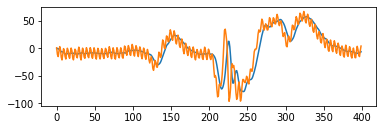

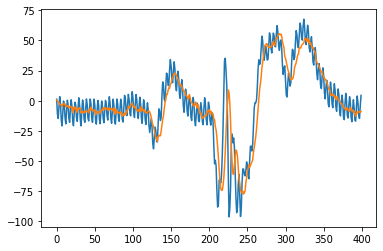

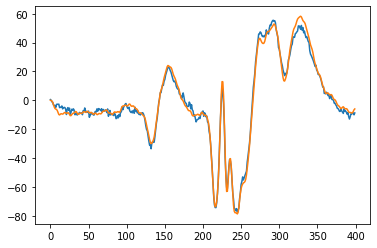

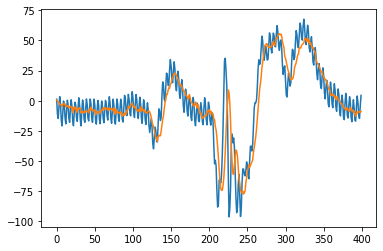

In [36]:
data_for_predict = np.array([X2[0]])
print(data_for_predict.shape)

predicted = model.predict(data_for_predict)[0]
# print(predicted)

plt.subplot(2,1,1)
plt.plot(y[0])
plt.plot(X[0].reshape(400))

plt.figure()
plt.plot(X[0].reshape(400))
plt.plot(predicted)

plt.figure()
plt.plot(predicted)
plt.plot(y[0])

plt.figure()
plt.plot(X[0].reshape(400))
plt.plot(predicted)

# Статистика по сигналу
## Дисперсия между одним жестом и разными субъектами

Text(0, 0.5, 'Среднеквадратическое отклонение')

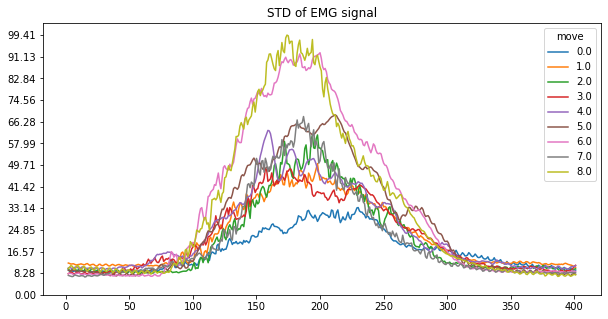

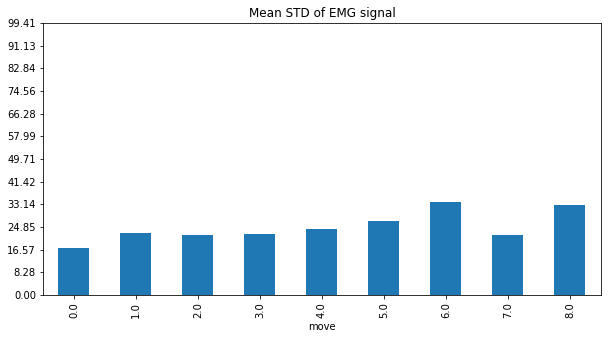

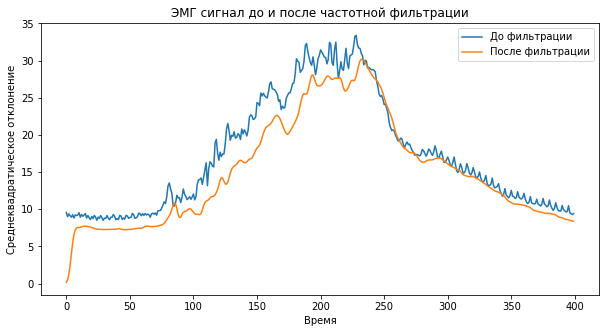

In [158]:
# display(df)
def plot_std_for_move(df, move_index):
    first_move = df[df['move'] == move_index]
    std_sum = first_move.describe()
    std_sum = std_sum.loc['std']
    std_sum = std_sum.T.drop(['move','subject'])
    std_sum = pd.DataFrame(std_sum)
    std_sum.plot(yticks=np.linspace(0,std_sum.max(),13), title=('Move of ' + str(i)))
    
group = df.drop(['subject'], axis=1).groupby(['move']).std()
# group = group.drop('subject')
group = group.T
group.plot(yticks=np.linspace(0,group.max().max(),13), title='STD of EMG signal', figsize=(10,5))

plt.figure()
group_mean = group.mean()
# display(group_mean)
group_mean.plot(kind='bar', yticks=np.linspace(0,group.max().max(),13), title='Mean STD of EMG signal', figsize=(10,5))

# for i in range(9):
#     plot_std_for_move(df, i)

pieces = df[df['move'] == 0].drop(columns=['subject','move']).values

for i in range(len(pieces)):
    pieces[i] = filter_signal(pieces[i])
filtered = pd.DataFrame(pieces)

filtered_group = pd.DataFrame(filtered.std())

unfiltered = pd.DataFrame(group[0])
unfiltered = unfiltered.reset_index(drop=True)
filtered_group = filtered_group.reset_index(drop=True)
# display(unfiltered.reset_index(drop=True))
# display(filtered_group)
final_group = pd.concat([unfiltered.T, filtered_group.T], keys=['До фильтрации', 'После фильтрации'], ignore_index=True) # 'raw','filtered'
final_group = final_group.T
final_group.columns=['До фильтрации', 'После фильтрации'] # 'raw','filtered'
# display(final_group)
# display(group[[0]])
# display(filtered_group)
# Standard deviation of EMG signal for one type of hand move (raw/filtered)
ax = final_group.plot(title='ЭМГ сигнал до и после частотной фильтрации', figsize=(10,5))
ax.set_xlabel('Время')
ax.set_ylabel('Среднеквадратическое отклонение')

## Дисперсия между разными жестами для одного субъекта

subject,0.0,1.0,2.0,3.0,4.0,5.0
2,7.535791,8.022288,7.925859,8.389543,14.147978,7.241068
3,7.301726,8.008426,8.323703,8.413503,14.032818,7.281119
4,7.519320,8.145788,8.209534,8.002241,14.499379,6.951174
5,7.742377,7.737330,7.802497,7.902210,14.794746,6.595621
6,7.299158,7.662644,7.506854,8.068980,14.577029,6.596013
...,...,...,...,...,...,...
397,5.767049,8.848427,7.257151,8.050971,14.146244,8.154589
398,5.441736,8.603053,7.358118,8.182863,14.110433,8.951548
399,5.158451,8.200051,7.052373,8.134361,14.476789,9.552702
400,5.394732,7.924958,7.040249,8.102385,14.625157,9.981414


Text(0, 0.5, 'Среднеквадратическое отклонение')

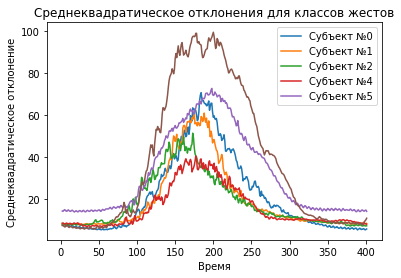

In [156]:
first_person_data = df # df[df['subject'] == 0]
group = first_person_data.drop(['move'], axis=1).groupby(['subject']).std()
# group = group.drop('subject')
group = group.T


# print(group.set_axis(['Субъект, №', 0, 1, 2, 3, 4,], axis=1, inplace=False))
# print(group.rename_axis('Субъект, №'))
# пкщгз =
 # .rename({'subject': 'Субъект, №'}, axis=1))
group = group.rename(index={'subject 2': '0.0'})
display(group)
ax = group.plot()
# ax.annotate('x', (0,0))
ax.legend(["Субъект №0", "Субъект №1", "Субъект №2", "Субъект №4", "Субъект №5"])
ax.set_title('Среднеквадратическое отклонения для классов жестов')
ax.set_xlabel('Время')
ax.set_ylabel('Среднеквадратическое отклонение')

# Построения набора данных для нейросетевой фильтрации

In [50]:
display(df)

# Фильтруем все данные
pieces = df.drop(columns=['subject','move']).values

for i in range(len(pieces)):
    pieces[i] = filter_signal(pieces[i])

filtered_df = pd.DataFrame(pieces)
filtered_df['subject'] = df['subject']
filtered_df['move'] = df['move']

display(filtered_df)

train_mask = filtered_df['subject'] < 4
train_df = filtered_df[train_mask]
test_df = filtered_df[~train_mask]

,subject,move,2,3,4,5,6,7,8,9,...,392,393,394,395,396,397,398,399,400,401
0,0.0,0.0,1.270740,-10.895926,-14.729259,-4.895926,3.437407,-2.229259,-15.895926,-20.895926,...,-6.229259,-16.395926,-16.895926,-4.562593,3.937407,-2.062593,-12.395926,-14.729259,-4.229259,4.437407
1,0.0,0.0,7.270741,-4.895926,-6.729259,4.770741,13.270741,7.104074,-5.562593,-8.229259,...,8.270741,-3.395926,-3.229259,9.770741,14.937407,6.604074,-4.729259,-3.729259,8.270741,15.770741
2,0.0,0.0,-0.895926,-12.062593,-9.562593,2.937407,9.437407,1.104074,-9.562593,-8.729259,...,9.437407,-0.062593,4.104074,15.604074,19.270741,8.770741,-1.895926,1.437407,12.104074,16.437407
3,0.0,0.0,-14.562593,-23.562593,-18.562593,-6.229259,-2.229259,-11.895926,-20.562593,-15.062593,...,-0.229260,-9.395926,-3.562593,7.770741,9.270741,-3.895926,-11.895926,-5.062593,6.604074,8.270741
4,0.0,0.0,-2.062593,-10.729259,-4.062593,5.770741,5.270741,-6.562593,-12.729259,-4.729259,...,-8.395926,-15.729259,-7.395926,4.270741,3.604074,-7.895926,-13.062593,-3.562593,6.937407,3.937407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815,5.0,8.0,-1.925307,-3.091973,-3.925307,-4.258640,-2.591973,-5.425307,-6.258640,-6.925307,...,-0.258640,-3.258640,-6.258640,-3.925307,-2.091973,-4.091973,-7.091973,-6.925307,-5.758640,-5.758640
2816,5.0,8.0,-4.591973,-2.091973,-1.758640,2.241360,3.408027,1.741360,-0.425307,-3.425307,...,-3.091973,-2.091973,-4.758640,-1.758640,2.074693,1.074693,-2.591973,-5.091973,-8.758640,-6.591973
2817,5.0,8.0,-0.925307,-5.258640,-0.591973,0.408027,-1.925307,0.741360,0.741360,-1.258640,...,-1.758640,-6.091973,-7.425307,-1.591973,2.241360,1.241360,-4.258640,-6.091973,-3.925307,-1.425307
2818,5.0,8.0,5.741360,-0.425307,1.574693,5.241360,4.908027,5.241360,-0.258640,0.408027,...,-5.591973,-8.591973,-8.258640,-4.758640,-6.758640,-3.258640,-2.425307,-1.925307,-1.591973,-4.258640


,0,1,2,3,4,5,6,7,8,9,...,392,393,394,395,396,397,398,399,subject,move
0,0.019184,-0.117956,-0.504385,-1.417703,-2.937734,-4.586769,-5.685070,-6.069641,-6.296389,-7.074130,...,-8.422348,-8.409098,-8.536901,-8.829320,-8.676672,-7.748808,-6.566791,-5.978247,0.0,0.0
1,0.109766,0.192368,0.388706,0.513958,0.438615,0.451957,0.966088,1.917473,2.703887,2.763526,...,5.965666,6.214184,6.039100,5.389569,4.914308,5.019141,5.256443,4.987919,0.0,0.0
2,-0.013526,-0.214920,-0.668653,-1.557169,-2.699478,-3.450672,-3.228912,-2.195842,-1.171587,-0.884318,...,10.048685,10.221024,9.952214,9.408643,9.212962,9.516529,9.671185,9.083959,0.0,0.0
3,-0.219850,-0.889058,-2.484337,-5.225749,-8.568529,-11.349164,-12.612922,-12.404340,-11.660034,-11.310731,...,0.643562,1.297163,1.217244,0.662370,0.370879,0.450769,0.341035,-0.349355,0.0,0.0
4,-0.031139,-0.237518,-0.644233,-1.372980,-2.175903,-2.563013,-2.316894,-1.846487,-1.766667,-2.210454,...,-2.693337,-2.727267,-3.565216,-4.556220,-4.799043,-4.286211,-3.743031,-3.632341,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815,-0.029066,-0.117191,-0.349812,-0.794492,-1.425174,-2.185004,-2.900753,-3.533980,-4.071332,-4.549576,...,-7.222252,-5.255603,-3.855187,-3.294331,-3.382001,-3.722752,-4.126938,-4.595246,5.0,8.0
2816,-0.069325,-0.199757,-0.526066,-0.942765,-1.272278,-1.251427,-0.765267,-0.027302,0.509383,0.429804,...,-6.296145,-5.815165,-5.019292,-4.010560,-2.943733,-2.032305,-1.466981,-1.504227,5.0,8.0
2817,-0.013969,-0.113277,-0.286744,-0.644808,-1.077226,-1.348137,-1.387163,-1.171165,-0.764088,-0.424928,...,-3.849866,-3.597630,-3.514349,-3.499151,-3.291547,-2.774456,-2.138335,-1.881805,5.0,8.0
2818,0.086677,0.203849,0.536951,0.997265,1.489779,2.048830,2.590274,3.070297,3.261120,3.100397,...,-8.278416,-7.892552,-7.492027,-7.115104,-6.784340,-6.275770,-5.503194,-4.583612,5.0,8.0


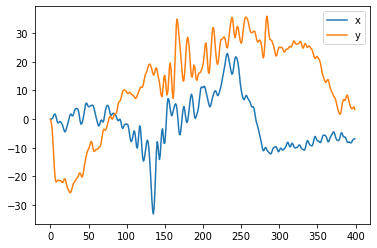

In [51]:
# Формируем X
# Формируем целевой вектор правильных ответов Y

# test_df = test_df.sample(frac=1)
size = test_df.count()[0]
X = []
y = []
for i in range(size):
    data = test_df.iloc[i]
    data_values = data.drop(['move', 'subject'])
    
    mask = (test_df['move'] == data.move)
    data_target = test_df[mask].sample(1)
    data_target = data_target.drop(['move', 'subject'], axis=1)
    X.append(data_values.values)
    y.append(data_target.values[0])
    
X = np.array(X)
y = np.array(y)
# Визуализация
plt.plot(X[0], label='x')
plt.plot(y[0], label='y')
plt.legend()

## Обучение

In [52]:
from keras.callbacks import EarlyStopping

X2 = np.zeros((len(X), 20, 20, 1))
for i in range(len(X)):
    data = X[i]
    X2[i] = np.reshape(data, (20,20,1))

X = X2

callback = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True, verbose=2)
history = model.fit(X, y, verbose=2, epochs=200, batch_size=64, callbacks=[callback])

Epoch 1/200
16/16 - 1s - loss: 1822.4479 - accuracy: 0.0051 - 708ms/epoch - 44ms/step
Epoch 2/200
16/16 - 1s - loss: 1612.9736 - accuracy: 0.0082 - 519ms/epoch - 32ms/step
Epoch 3/200
16/16 - 1s - loss: 1611.3191 - accuracy: 0.0092 - 550ms/epoch - 34ms/step
Epoch 4/200
16/16 - 1s - loss: 1586.4919 - accuracy: 0.0103 - 533ms/epoch - 33ms/step
Epoch 5/200
16/16 - 1s - loss: 1553.1470 - accuracy: 0.0154 - 517ms/epoch - 32ms/step
Epoch 6/200
16/16 - 1s - loss: 1540.3208 - accuracy: 0.0144 - 537ms/epoch - 34ms/step
Epoch 7/200
16/16 - 1s - loss: 1507.3572 - accuracy: 0.0154 - 690ms/epoch - 43ms/step
Epoch 8/200
16/16 - 0s - loss: 1488.8669 - accuracy: 0.0133 - 494ms/epoch - 31ms/step
Epoch 9/200
16/16 - 1s - loss: 1486.8829 - accuracy: 0.0175 - 531ms/epoch - 33ms/step
Epoch 10/200
16/16 - 1s - loss: 1460.1978 - accuracy: 0.0185 - 528ms/epoch - 33ms/step
Epoch 11/200
16/16 - 1s - loss: 1420.5941 - accuracy: 0.0154 - 528ms/epoch - 33ms/step
Epoch 12/200
16/16 - 1s - loss: 1429.7015 - accuracy

Epoch 96/200
16/16 - 1s - loss: 743.1175 - accuracy: 0.0883 - 1s/epoch - 64ms/step
Epoch 97/200
16/16 - 1s - loss: 754.5114 - accuracy: 0.0914 - 1s/epoch - 63ms/step
Epoch 98/200
16/16 - 1s - loss: 751.0698 - accuracy: 0.0975 - 1s/epoch - 74ms/step
Epoch 99/200
16/16 - 1s - loss: 737.4529 - accuracy: 0.0852 - 1s/epoch - 86ms/step
Epoch 100/200
16/16 - 1s - loss: 716.5403 - accuracy: 0.0945 - 1s/epoch - 78ms/step
Epoch 101/200
16/16 - 2s - loss: 712.2545 - accuracy: 0.1088 - 2s/epoch - 94ms/step
Epoch 102/200
16/16 - 2s - loss: 725.9726 - accuracy: 0.1078 - 2s/epoch - 94ms/step
Epoch 103/200
16/16 - 2s - loss: 737.8983 - accuracy: 0.0811 - 2s/epoch - 101ms/step
Epoch 104/200
16/16 - 2s - loss: 705.7050 - accuracy: 0.0965 - 2s/epoch - 94ms/step
Epoch 105/200
16/16 - 1s - loss: 700.9199 - accuracy: 0.1068 - 1s/epoch - 85ms/step
Epoch 106/200
16/16 - 1s - loss: 698.0836 - accuracy: 0.1088 - 1s/epoch - 78ms/step
Epoch 107/200
16/16 - 1s - loss: 694.8366 - accuracy: 0.1006 - 1s/epoch - 66ms/

Epoch 191/200
16/16 - 1s - loss: 494.6477 - accuracy: 0.1612 - 678ms/epoch - 42ms/step
Epoch 192/200
16/16 - 1s - loss: 490.2992 - accuracy: 0.1643 - 621ms/epoch - 39ms/step
Epoch 193/200
16/16 - 1s - loss: 492.4752 - accuracy: 0.1489 - 635ms/epoch - 40ms/step
Epoch 194/200
16/16 - 1s - loss: 514.5610 - accuracy: 0.1417 - 639ms/epoch - 40ms/step
Epoch 195/200
16/16 - 1s - loss: 501.5221 - accuracy: 0.1509 - 637ms/epoch - 40ms/step
Epoch 196/200
16/16 - 1s - loss: 478.0896 - accuracy: 0.1561 - 660ms/epoch - 41ms/step
Epoch 197/200
16/16 - 1s - loss: 477.2600 - accuracy: 0.1766 - 678ms/epoch - 42ms/step
Epoch 198/200
16/16 - 1s - loss: 495.2611 - accuracy: 0.1653 - 668ms/epoch - 42ms/step
Epoch 199/200
16/16 - 1s - loss: 474.5268 - accuracy: 0.1489 - 664ms/epoch - 42ms/step
Epoch 200/200
16/16 - 1s - loss: 465.0752 - accuracy: 0.1550 - 677ms/epoch - 42ms/step


1/1 [==============================] - 0s 54ms/step


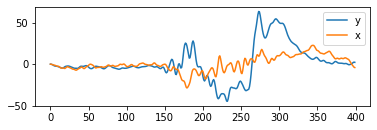

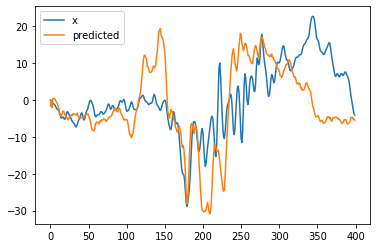

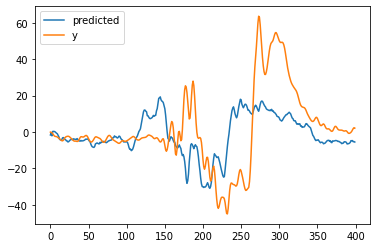

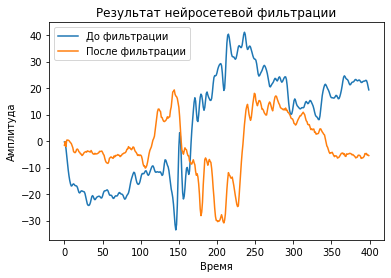

In [79]:
plt.plot(history.history['loss'])

X_for_predict2 = np.array([X[example_index]])
example_index = 10
predicted = model.predict(X_for_predict2)[0]


plt.subplot(2,1,1)
plt.plot(y[example_index], label='y')
plt.plot(X[example_index].reshape(400), label='x')
plt.legend()

plt.figure()
plt.plot(X[example_index].reshape(400), label='x')
plt.plot(predicted, label='predicted')
plt.legend()

plt.figure()
plt.plot(predicted, label='predicted')
plt.plot(y[example_index], label='y')
plt.legend()

example_index = 2
plt.figure()
plt.plot(X[example_index].reshape(400), label='До фильтрации') # Input data
plt.plot(predicted, label='После фильтрации')
plt.title('Результат нейросетевой фильтрации')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.legend()

## Оценка. Подсчет статистики

1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 19ms/step


<AxesSubplot:title={'center':'Standard deviation of EMG signal for one type of hand move (raw/filtered)'}>

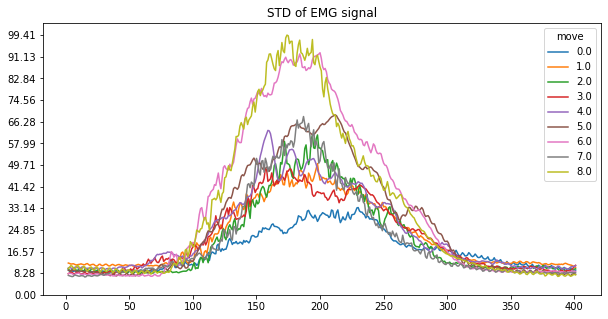

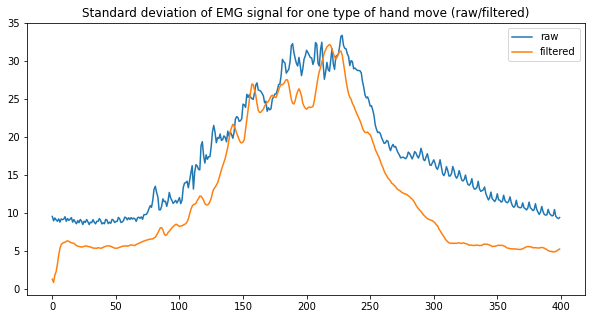

In [55]:
group = df.drop(['subject'], axis=1).groupby(['move']).std()
# group = group.drop('subject')
group = group.T
group.plot(yticks=np.linspace(0,group.max().max(),13), title='STD of EMG signal', figsize=(10,5))

pieces = df[df['move'] == 0].drop(columns=['subject','move']).values

for i in range(len(pieces)):
    filtered_data = filter_signal(pieces[i])
    pieces[i] = model.predict(np.array([filtered_data.reshape(20,20,1)]))
filtered = pd.DataFrame(pieces)


Text(0.5, 0, 'Время')

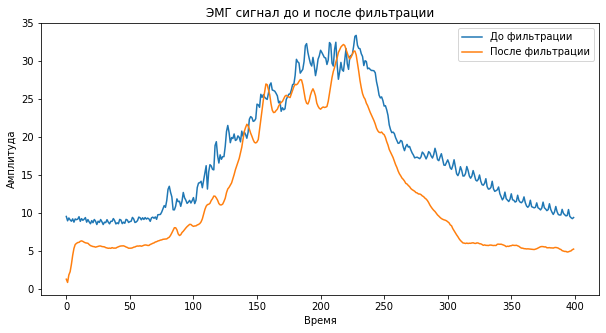

In [61]:
filtered_group = pd.DataFrame(filtered.std())

unfiltered = pd.DataFrame(group[0])
unfiltered = unfiltered.reset_index(drop=True)
filtered_group = filtered_group.reset_index(drop=True)

# 'raw','filtered'
final_group = pd.concat([unfiltered.T, filtered_group.T], keys=['До фильтрации', 'После фильтрации'], ignore_index=True)
final_group = final_group.T
# 'raw','filtered'
final_group.columns=['До фильтрации','После фильтрации']
# Standard deviation of EMG signal for one type of hand move (raw/filtered)
ax = final_group.plot(title='ЭМГ сигнал до и после фильтрации', figsize=(10,5))


ax.set_ylabel('Амплитуда')
ax.set_xlabel('Время')

89/89 [==============================] - 1s 6ms/step


,До фильтрации,После фильтрации,Разница
move,,,
0.0,17.250399,13.313470,3.936929
1.0,22.676796,19.571318,3.105478
2.0,21.768037,23.101319,-1.333282
3.0,22.270395,20.104357,2.166038
4.0,24.179709,20.225786,3.953923
5.0,27.142294,21.105234,6.037061
6.0,33.869529,32.872024,0.997505
7.0,22.040226,21.964526,0.075700
8.0,32.881699,35.296360,-2.414661


0.07374490853645892

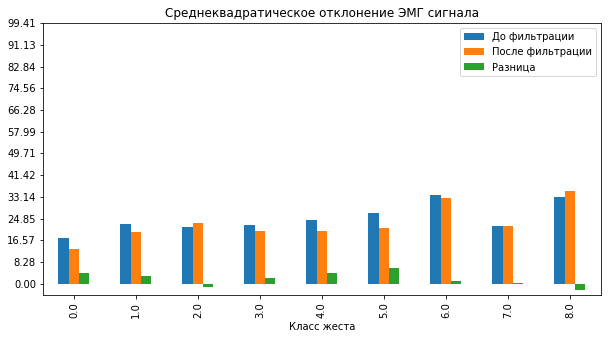

In [65]:
# Просто пример вывода
def plot_difference(group, group_filter):
    group_mean = group.mean()
    group_filter_mean = group_filter.mean()
    final_group = pd.concat([group_mean, group_filter_mean, group_mean - group_filter_mean], axis=1)
    final_group.columns = ['До фильтрации', 'После фильтрации', 'Разница']

    display(final_group)
    ax = final_group.plot(kind='bar', yticks=np.linspace(0,group.max().max(),13), title='Среднеквадратическое отклонение ЭМГ сигнала', figsize=(10,5))
    ax.set_xlabel('Класс жеста')
    group_mean = final_group.mean()
    display(group_mean['Разница'] / group_mean['До фильтрации'])

    
raw_data = df.drop(['subject'], axis=1).groupby(['move'])

filtered_data = df.drop(['subject'], axis=1)
filtered_values = filtered_data.drop(['move'], axis=1).values
# display(filtered_values)
filtered_values_new = np.zeros((len(filtered_values), 20, 20, 1))
for i in range(len(filtered_values)):
    filtered_values_new[i] = np.reshape(filtered_values[i], (20,20,1))
filtered_values = model.predict(filtered_values_new)
# display(filtered_values)

filtered_data = pd.DataFrame(filtered_values)
filtered_data['move'] = df['move']
# filtered_data.groupby(['move']).mean().T[0].plot()
# filtered_data.groupby(['move']).mean().T[7].plot()

filtered_data = filtered_data.groupby(['move'])
raw_group = raw_data.std()
raw_group = raw_group.T

filtered_group = filtered_data.std()
filtered_group = filtered_group.T


plot_difference(raw_group, filtered_group)


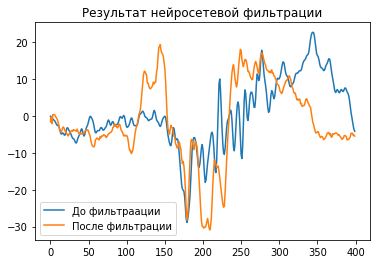

In [145]:
# Сравниваем конкретные сигналы до и после фильтрации
example_index = 10
plt.figure()
plt.plot(X[example_index].reshape(400), label='До фильтраации') # Input data
plt.plot(predicted, label='После фильтрации') # Predicted
plt.title('Результат нейросетевой фильтрации')
plt.legend()

subject,0.0,1.0,2.0,3.0,4.0,5.0
2,7.535791,8.022288,7.925859,8.389543,14.147978,7.241068
3,7.301726,8.008426,8.323703,8.413503,14.032818,7.281119
4,7.519320,8.145788,8.209534,8.002241,14.499379,6.951174
5,7.742377,7.737330,7.802497,7.902210,14.794746,6.595621
6,7.299158,7.662644,7.506854,8.068980,14.577029,6.596013
...,...,...,...,...,...,...
397,5.767049,8.848427,7.257151,8.050971,14.146244,8.154589
398,5.441736,8.603053,7.358118,8.182863,14.110433,8.951548
399,5.158451,8.200051,7.052373,8.134361,14.476789,9.552702
400,5.394732,7.924958,7.040249,8.102385,14.625157,9.981414


subject,0.0,1.0,2.0,3.0,4.0,5.0
0,1.904846,1.853807,1.443983,1.426647,2.243431,3.372363
1,1.659268,1.525591,1.428473,1.167505,1.536269,2.463503
2,2.860871,2.705279,2.211566,2.175502,3.837464,4.729257
3,3.661142,3.925658,2.954612,2.798197,3.791691,5.885208
4,5.202438,5.823276,4.272351,4.225656,5.316225,7.991457
...,...,...,...,...,...,...
395,9.682952,9.146005,7.686349,7.019699,8.741546,14.760708
396,9.720895,9.192635,7.616899,6.951681,8.795785,14.786237
397,9.706983,9.047886,7.637272,7.072069,8.833939,14.837591
398,9.670342,9.069085,7.645846,7.014008,8.909487,14.858885


Text(0.5, 0, 'Время')

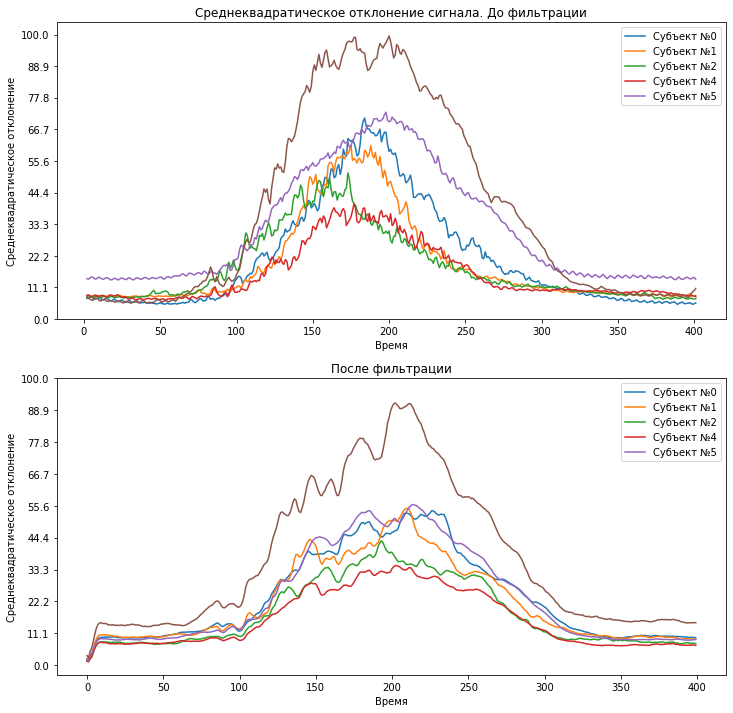

In [155]:
# Для разных жестов одного субъекта
fig, axes = plt.subplots(2, 1, figsize=(12,12))

# Raw data
first_person_data = df # df[df['subject'] == 0]
group = first_person_data.drop(['move'], axis=1).groupby(['subject']).std()
# group = group.drop('subject')
group = group.T
display(group)
# Std between various move types. Before filtering
ax = group.plot(ax=axes[0], yticks=np.linspace(0,100,10), title='Среднеквадратическое отклонение сигнала. До фильтрации')

ax.legend(["Субъект №0", "Субъект №1", "Субъект №2", "Субъект №4", "Субъект №5"])
ax.set_ylabel('Среднеквадратическое отклонение')
ax.set_xlabel('Время')

# Filtered data
filtered_data = pd.DataFrame(filtered_values)
filtered_data['move'] = df['move']
filtered_data['subject'] = df['subject']
first_person_data = filtered_data # df[df['subject'] == 0]
group = first_person_data.drop(['move'], axis=1).groupby(['subject']).std()
# group = group.drop('subject')
group = group.T
display(group)
# After filtering
ax = group.plot(ax=axes[1], title='После фильтрации', yticks=np.linspace(0,100,10), legend=False)

ax.legend(["Субъект №0", "Субъект №1", "Субъект №2", "Субъект №4", "Субъект №5"])
ax.set_ylabel('Среднеквадратическое отклонение')
ax.set_xlabel('Время')

In [ ]:
model.save('model_14_07_21.h5')